In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from plotnine import *

In [2]:
xs = np.random.randint(0, 100, 50)
ys = np.random.randint(0, 100, 50)

In [3]:
df = pd.DataFrame({"x":xs, "y":ys})

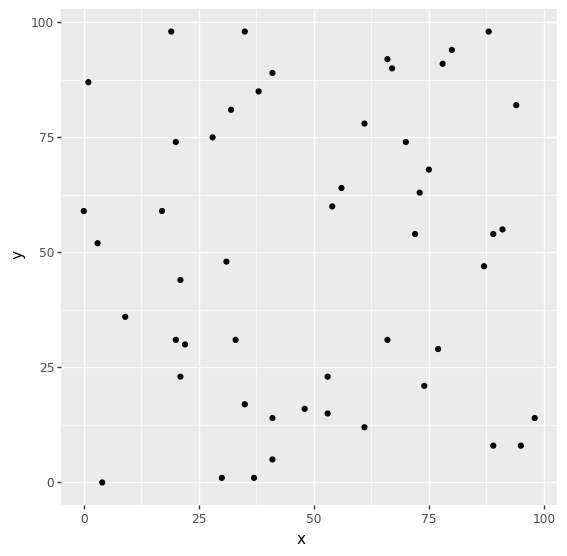

<ggplot: (8775344811147)>

In [5]:
ggplot(df, aes(x="x", y="y")) + geom_point() + theme(aspect_ratio=1)

In [6]:
def distance(xs, ys, i, j) :
    return np.sqrt((xs[i] - xs[j]) ** 2 + 
                   (ys[i] - ys[j]) ** 2)

In [7]:
distance(xs, ys, 4, 7)

45.69463863518345

In [8]:
tour = np.arange(len(xs))

In [9]:
tour

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [23]:
def tour_distance(t, xs, ys):
    d = 0
    s = len(t)
    for i in range(s):
        d += distance(xs, ys, t[i], t[(i + 1) % s])
    return d

In [24]:
tour_distance(tour, xs, ys)

2404.4631597355324

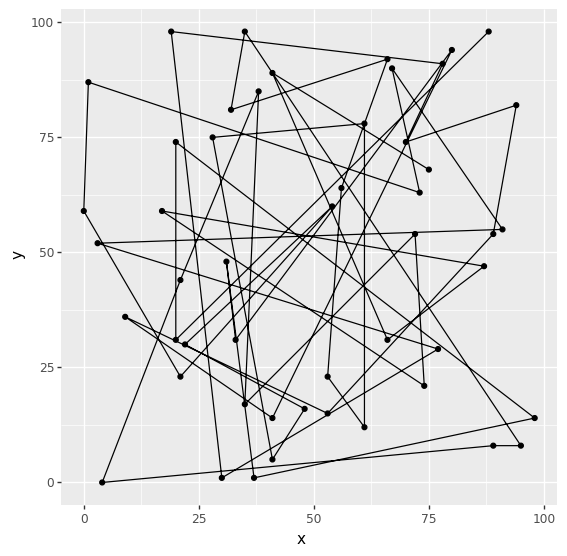

<ggplot: (8775345151377)>

In [14]:
ggplot(df, aes(x="x", y="y")) + geom_point() + geom_path() + theme(aspect_ratio=1)

In [16]:
def swap(t, i, j):
    t[i], t[j] = t[j], t[i]

In [25]:
swap(tour, 4, 18)

In [28]:
tour

array([ 0,  1,  2,  3,  8,  5,  6,  7,  4,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [27]:
tour_distance(tour, xs, ys)

2472.260741929085

In [29]:
df = df.reindex(tour)

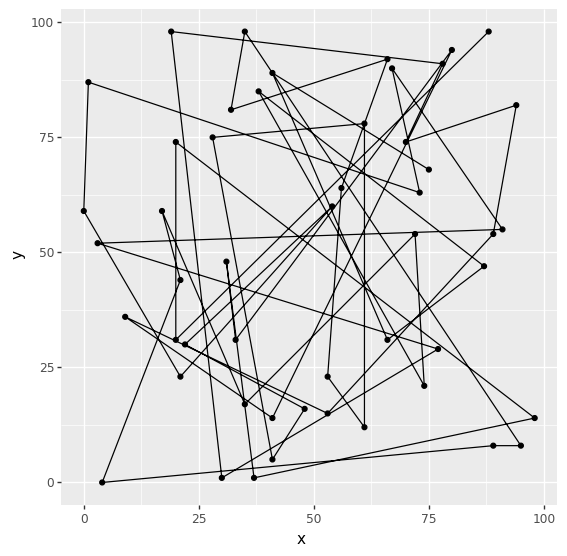

<ggplot: (8775345357120)>

In [30]:
ggplot(df, aes(x="x", y="y")) + geom_point() + geom_path() + theme(aspect_ratio=1)

In [31]:
class Map():
    
    def __init__(self, size):
        self.size = size
        self.xs = np.random.randint(1, 99, size)
        self.ys = np.random.randint(1, 99, size)
        
    def distance(self, i, j):
        return np.sqrt((self.xs[i] - self.xs[j]) ** 2 + 
                       (self.ys[i] - self.ys[j]) ** 2)        

class Tour():
    
    def __init__(self, m):
        self.m = m
        self.cities = np.arange(self.m.size)
        np.random.shuffle(self.cities)
        
    def clone(self):
        c = Tour(self.m)
        c.cities = np.copy(self.cities)
        return c
    
    def distance(self):
        d = 0
        for i in range(self.m.size):
            d += self.m.distance(self.cities[i], self.cities[(i + 1) % self.m.size])
        return d        
    
    def swap(self, i, j):
        self.cities[i], self.cities[j] = self.cities[j], self.cities[i]
        
    def plot(self):
        df = pd.DataFrame({"x":self.m.xs, 
                           "y":self.m.ys})
        df = df.reindex(self.cities)
        return ggplot(df, aes(x="x", y="y")) + geom_point() \
    + geom_path() + theme(aspect_ratio=1) + xlim(0, 100) + ylim(0, 100)

In [32]:
world = Map(50)
t = Tour(world)
t2 = t.clone()

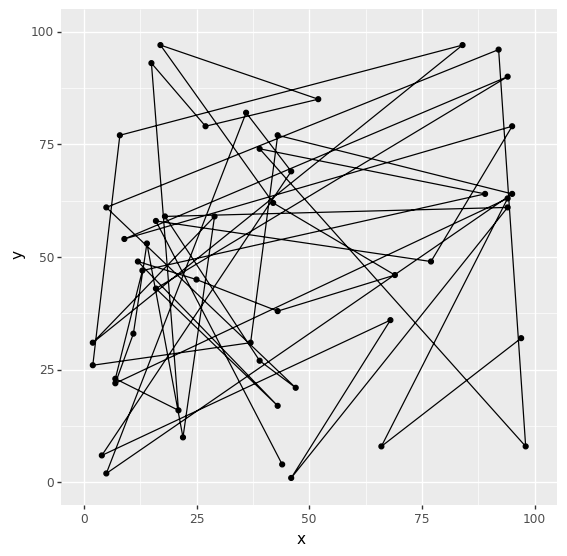

<ggplot: (8775345506744)>

In [33]:
t.plot()

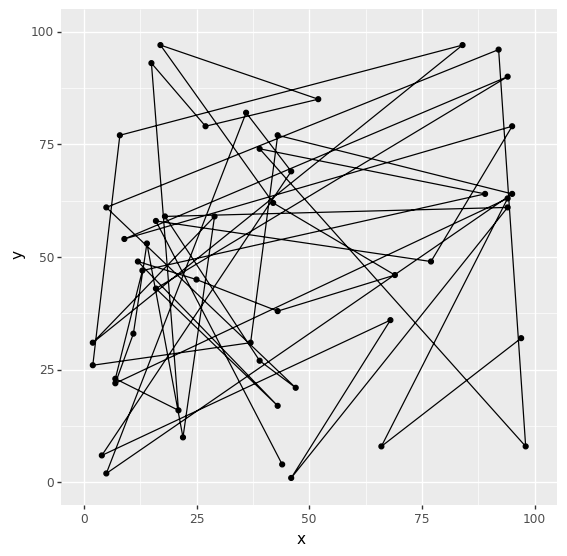

<ggplot: (8775345770527)>

In [34]:
t2.plot()

In [35]:
t.distance()

2695.1206028768092

In [36]:
t2.distance()

2695.1206028768092

In [49]:
t2.swap(4, 22)

In [50]:
t2.distance()

2710.9334496986958

In [51]:
def descent(t):
    finished = False
    while not finished:
        d = t.distance()
        best_d = d
        best_i = -1
        best_j = -1
        s = t.m.size
        finished = True
        for i in range(s):
            for j in range(i + 1, s):
                t.swap(i, j)
                od = t.distance()
                if od < best_d:
                    finished = False
                    best_d = od
                    best_i = i
                    best_j = j
                t.swap(i, j)
        if not finished:
            t.swap(best_i, best_j)
            print(t.distance())

In [52]:
descent(t2)

2425.5799795604808
2203.4964074943664
2063.3713721070953
1927.5003554569867
1807.5534344001755
1709.6593238699081
1621.94905102283
1566.8431771371406
1524.6433409846627
1483.0033430350284
1448.4864684940662
1414.179457296776
1380.4476490826537
1348.136868840319
1324.3594770501934
1276.3538270303768
1244.656781927726
1224.2830482235586
1193.318474045473
1180.6314650327627
1168.9883066875682
1159.486962068416
1147.3265472789171
1139.0726156403884
1131.1454948162545
1091.4134805085775
1052.8359254353
1042.195323536579
1030.0192651817576
1022.3600637965533
1012.0982849292284
1006.1676544251422
1001.2634346393413
994.6550252401255
990.4523366993458
987.2444532806837
984.6865282070876
982.4930310050377


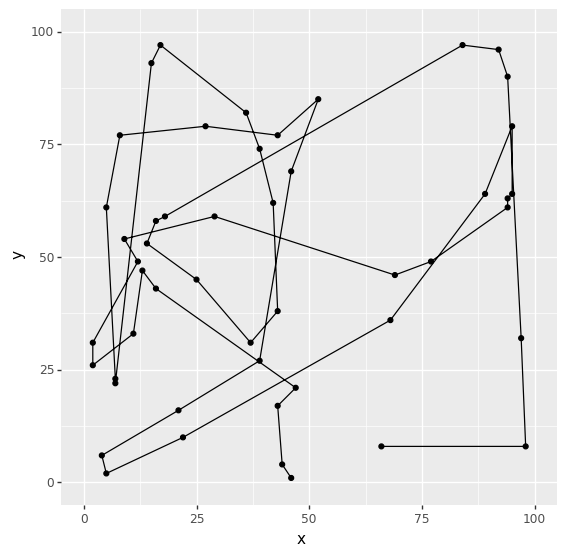

<ggplot: (8775344852086)>

In [53]:
t2.plot()